In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 30000, weights  = [0.9,0.1], random_state = 42)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

Предсказывают два классификатора одинаково быстро, а вот обучается XGBoost втрое быстрее sklearn-овского.

Точность классификации сопоставимая, но XGBoost таки капелюшку лучше.

In [50]:
%%timeit
clf1 = xgb.XGBClassifier().fit(X_train, y_train)

1 loop, best of 3: 1.82 s per loop


In [51]:
%%timeit
clf2 = GradientBoostingClassifier().fit(X_train, y_train)

1 loop, best of 3: 6.71 s per loop


In [60]:
%%timeit
_ = clf1.predict(X_test)

10 loops, best of 3: 18.8 ms per loop


In [61]:
%%timeit
_ = clf2.predict(X_test)

10 loops, best of 3: 25.6 ms per loop


In [62]:
print(roc_auc_score(y_test,clf1.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1]))

0.513132978086
0.507933586692


In [63]:
kf = KFold(random_state = 42, shuffle = True, n_splits = 10)
cv1 = cross_val_score(clf1, X, y, cv = kf)
cv2 = cross_val_score(clf2, X, y, cv = kf)
print(np.mean(cv1))
print(np.mean(cv2))

0.945766666667
0.9532


Как оказалось, sklearn слегка выигрывает XGBoost на каждой из выборок.

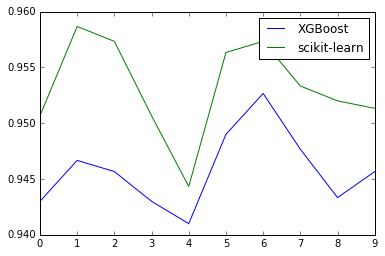

In [65]:
plt.plot(cv1)
plt.plot(cv2)
plt.legend(['XGBoost', 'scikit-learn'])